Зробити аналіз датасета. Побудувати не менше 10 зображень, графіків, діаграм. 

По кожній картинці зробити невелеке резюме.

Створити не менше 5 нових фічей вручну

Додатково -  застосувати бібліотеку для автоматичної генерації нових фічей

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# We will use the Seaborn library
import seaborn as sns
import featuretools as ft


In [2]:
player_data_df = pd.read_csv("./hw-4/hw_vis/player_data.csv")
# Drop missing values
player_data_df.dropna(inplace=True)
# Drop duplicates
player_data_df.drop_duplicates(inplace=True)
player_data_df

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University
...,...,...,...,...,...,...,...,...
4542,Derrick Zimmerman,2006,2006,G,6-3,195.0,"December 2, 1981",Mississippi State University
4543,Stephen Zimmerman,2017,2017,C,7-0,240.0,"September 9, 1996","University of Nevada, Las Vegas"
4546,Jim Zoet,1983,1983,C,7-1,240.0,"December 20, 1953",Kent State University
4547,Bill Zopf,1971,1971,G,6-1,170.0,"June 7, 1948",Duquesne University


In [3]:
players_data_df = pd.read_csv("./hw-4/hw_vis/Players.csv")
# Drop missing values
players_data_df.dropna(inplace=True)
players_data_df.drop('Unnamed: 0', axis=1, inplace=True)
# Drop duplicates
players_data_df.drop_duplicates(inplace=True)
players_data_df

,Player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
...,...,...,...,...,...,...,...
3915,Okaro White,203.0,92.0,Florida State University,1992.0,Clearwater,Florida
3916,Isaiah Whitehead,193.0,96.0,Seton Hall University,1995.0,Brooklyn,New York
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon


In [4]:
# looks player_data_df and players_data_df are similar, 
# the only data which we can get from player_data_df is birth_state and birth_state
# We'll ignore it for now and skip players_data_df in analysis and focus on player_data_df and seasons_data_df

# convert columns
player_data_df['birth_date_datetime'] = pd.to_datetime(player_data_df['birth_date'])
player_data_df['birth_year'] = player_data_df['birth_date_datetime'].dt.year

# convert height to cm
# remove rows which has missing height 
player_data_df.dropna(subset=['height'], inplace=True)
# Function to convert height from feet-inches to inches
def height_to_inches(height):
    feet, inches = map(int, height.split('-'))
    return feet * 12 + inches

# Function to convert height from feet-inches to centimeters
def height_to_cm(height):
    inches = height_to_inches(height)
    return inches * 2.54
player_data_df['height_in_cm'] = player_data_df['height'].apply(height_to_cm)
# Add new feature years_in_play
player_data_df['years_in_play'] = player_data_df['year_end'] - player_data_df['year_start']
# Drop unused birth_date
player_data_df.drop(columns='birth_date', inplace=True)
player_data_df

,name,year_start,year_end,position,height,weight,college,birth_date_datetime,birth_year,height_in_cm,years_in_play
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,Duke University,1968-06-24,1968,208.28,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,Iowa State University,1946-04-07,1946,205.74,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"University of California, Los Angeles",1947-04-16,1947,218.44,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,Louisiana State University,1969-03-09,1969,185.42,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,San Jose State University,1974-11-03,1974,198.12,5
...,...,...,...,...,...,...,...,...,...,...,...
4542,Derrick Zimmerman,2006,2006,G,6-3,195.0,Mississippi State University,1981-12-02,1981,190.50,0
4543,Stephen Zimmerman,2017,2017,C,7-0,240.0,"University of Nevada, Las Vegas",1996-09-09,1996,213.36,0
4546,Jim Zoet,1983,1983,C,7-1,240.0,Kent State University,1953-12-20,1953,215.90,0
4547,Bill Zopf,1971,1971,G,6-1,170.0,Duquesne University,1948-06-07,1948,185.42,0


In [5]:
seasons_data_df = pd.read_csv("./hw-4/hw_vis/Seasons_Stats.csv")
# Drop missing values
seasons_data_df.dropna(inplace=True, how='all')
seasons_data_df.dropna(subset=['Year', 'Player', 'Pos', 'Age'], inplace=True)
# I'm not going to analyze detailed player performance, so 
# I drop the columns I'm not interested
columns_to_drop = ['Unnamed: 0', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 
                   'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM',
                   'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 
                   'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
seasons_data_df.drop(columns=columns_to_drop, inplace=True)
# Drop duplicates
seasons_data_df.drop_duplicates(inplace=True)
seasons_data_df['Year'] = seasons_data_df['Year'].astype(int)
seasons_data_df['Age'] = seasons_data_df['Age'].astype(int)
seasons_data_df

,Year,Player,Pos,Age,PTS
0,1950,Curly Armstrong,G-F,31,458.0
1,1950,Cliff Barker,SG,29,279.0
2,1950,Leo Barnhorst,SF,25,438.0
3,1950,Ed Bartels,F,24,63.0
4,1950,Ed Bartels,F,24,59.0
...,...,...,...,...,...
24686,2017,Cody Zeller,PF,24,639.0
24687,2017,Tyler Zeller,C,27,178.0
24688,2017,Stephen Zimmerman,C,20,23.0
24689,2017,Paul Zipser,SF,22,240.0


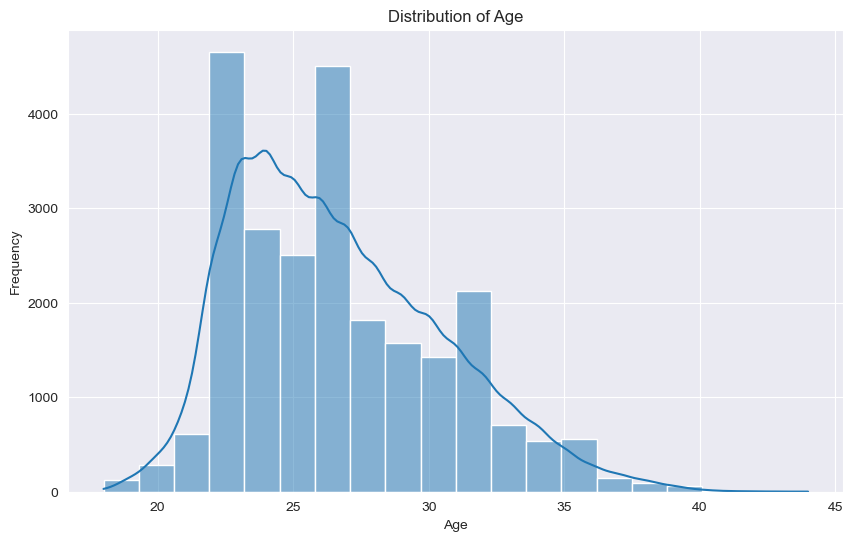

In [6]:
# Review the distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(seasons_data_df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# We can see the age of most active players which is between 22 and 27

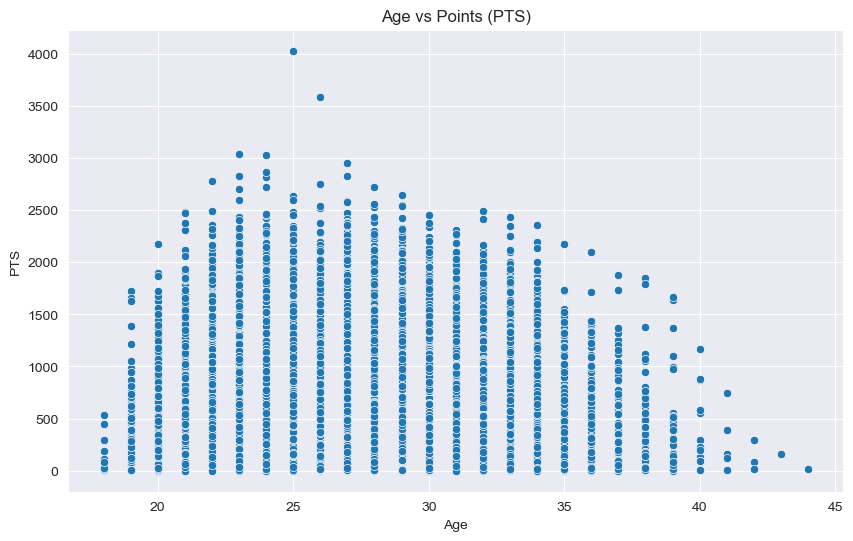

In [7]:
# Correlation between age and points (PTS)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PTS', data=seasons_data_df)
plt.title('Age vs Points (PTS)')
plt.xlabel('Age')
plt.ylabel('PTS')
plt.show()

# We see that performance of the the players is at high in age 23-24

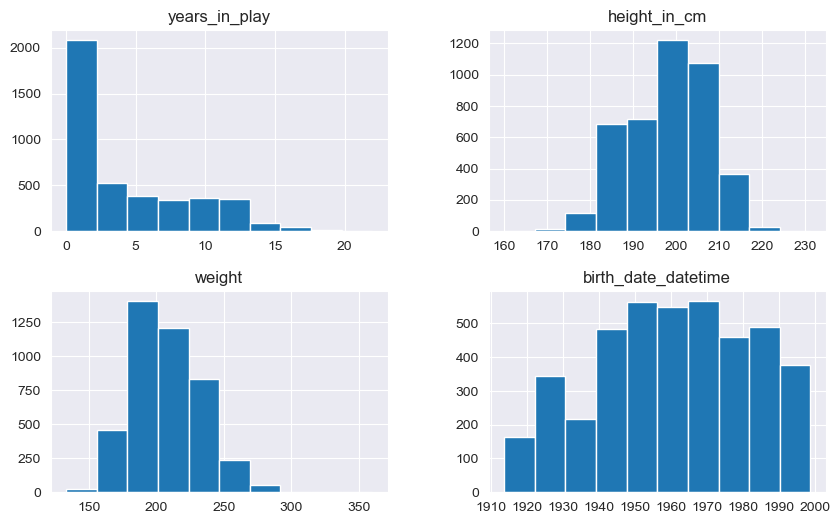

In [8]:
player_features = ['years_in_play', 'height_in_cm', 'weight', 'birth_date_datetime']
player_data_df[player_features].hist(figsize=(10, 6));
# Review distributions of data by feature for Player data
# as we can see the data looks valid and expected
# - the majority of players are above 2m height
# - usually career is less than 3 years
# - there are fewer players born in 1930-th, which is expected because of WW2  


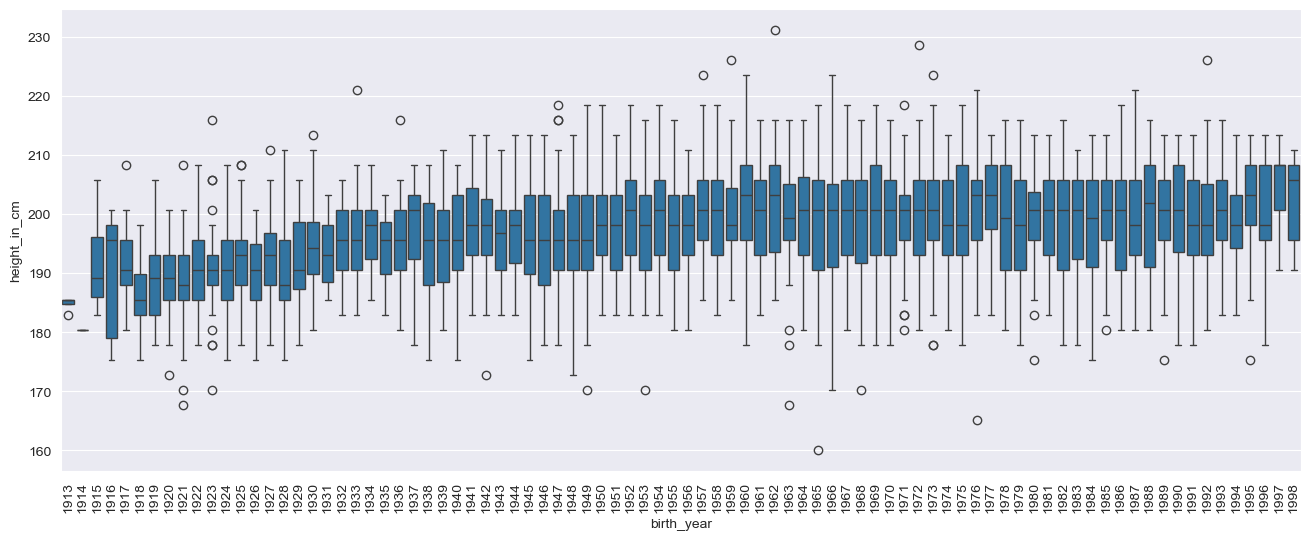

In [9]:
# Let's take a look how height depends on birth year
plt.figure(figsize=(16, 6))
sns.boxplot(x="birth_year", y="height_in_cm", data=player_data_df[['height_in_cm', 'birth_year']])
plt.xticks(rotation=90)
plt.show()

# Here we can observe an increase in the height of the players from year to year.

               birth_year    weight  years_in_play  height_in_cm
birth_year       1.000000  0.343344       0.117879      0.284612
weight           0.343344  1.000000       0.114646      0.822154
years_in_play    0.117879  0.114646       1.000000      0.141010
height_in_cm     0.284612  0.822154       0.141010      1.000000


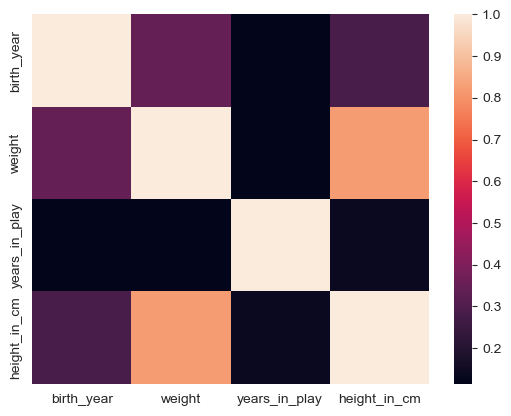

In [10]:
numerical = list(
    set(player_data_df.columns)
    - {"name", "position", "height", "birth_date", "college", 'birth_date_datetime', 'year_start', 'year_end'}
)

# Calculate and plot
corr_matrix = player_data_df[numerical].corr()
sns.heatmap(corr_matrix)
print(corr_matrix)
# We see strong correlation of the height and weight which is expected 
# the rest features has week correlation which is fine

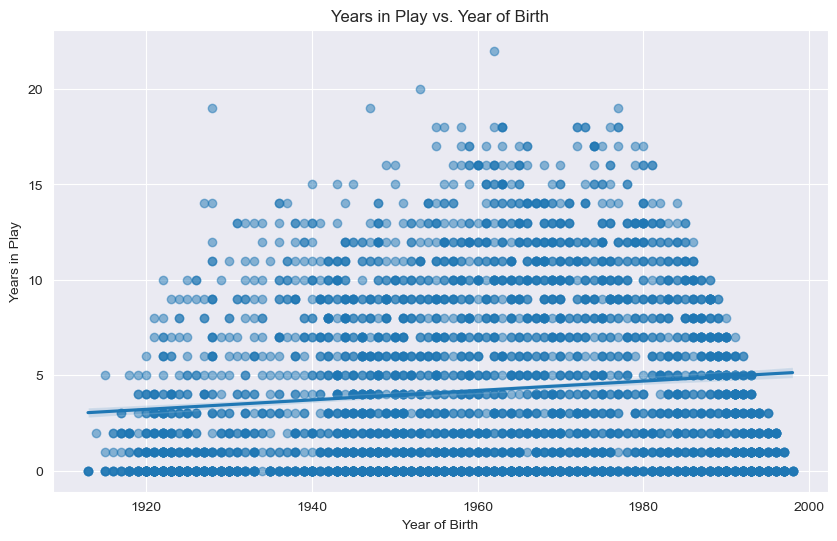

In [11]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='birth_year', y='years_in_play', data=player_data_df, scatter_kws={'alpha':0.5})
plt.title('Years in Play vs. Year of Birth')
plt.xlabel('Year of Birth')
plt.ylabel('Years in Play')
plt.show()
# Also we can see that from year to year the number of years the player spend in play increases

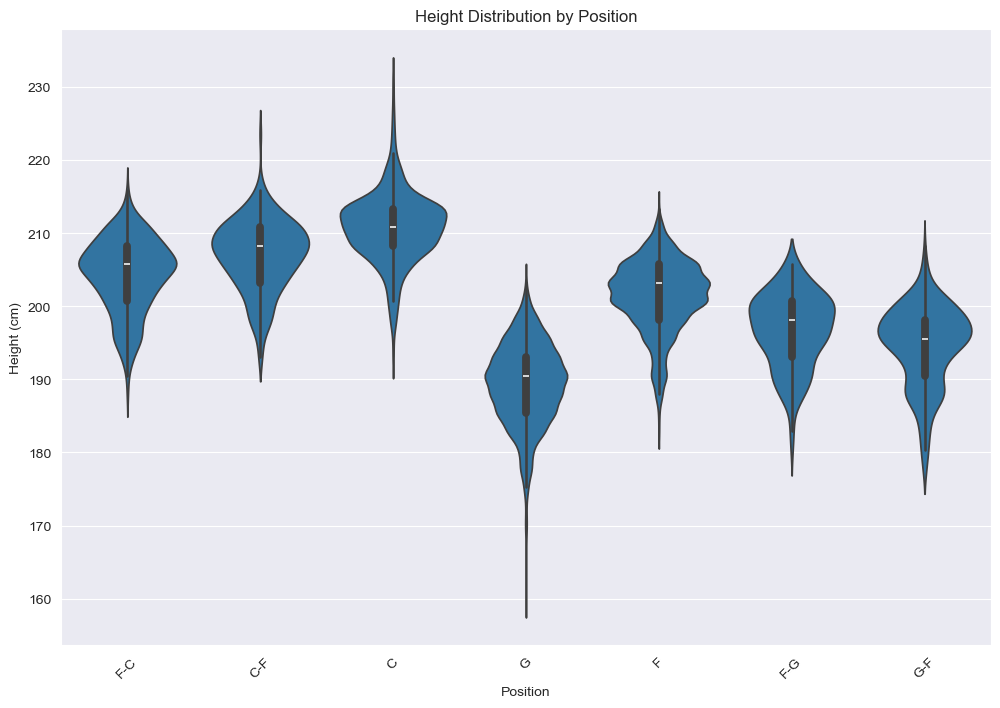

In [12]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='position', y='height_in_cm', data=player_data_df)
plt.title('Height Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Height (cm)')
plt.xticks(rotation=45)
plt.show()
# Here we can see the position of the player depends on height he has, especially if we are talking about guardians

In [13]:
seasons_data_df
player_data_df

,name,year_start,year_end,position,height,weight,college,birth_date_datetime,birth_year,height_in_cm,years_in_play
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,Duke University,1968-06-24,1968,208.28,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,Iowa State University,1946-04-07,1946,205.74,9
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"University of California, Los Angeles",1947-04-16,1947,218.44,19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,Louisiana State University,1969-03-09,1969,185.42,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,San Jose State University,1974-11-03,1974,198.12,5
...,...,...,...,...,...,...,...,...,...,...,...
4542,Derrick Zimmerman,2006,2006,G,6-3,195.0,Mississippi State University,1981-12-02,1981,190.50,0
4543,Stephen Zimmerman,2017,2017,C,7-0,240.0,"University of Nevada, Las Vegas",1996-09-09,1996,213.36,0
4546,Jim Zoet,1983,1983,C,7-1,240.0,Kent State University,1953-12-20,1953,215.90,0
4547,Bill Zopf,1971,1971,G,6-1,170.0,Duquesne University,1948-06-07,1948,185.42,0


In [14]:
# Fix data before use feature tools. We need remove duplicates and setup correct indexes

# Remove asterisks from player names
player_data_df['name'] = player_data_df['name'].str.replace('*', '', regex=False)
seasons_data_df['Player'] = seasons_data_df['Player'].str.replace('*', '', regex=False)

# Create a unique identifier BirthYear_PlayerName in player_data_df
player_data_df['BirthYear_PlayerName'] = player_data_df['birth_year'].astype(str) + '_' + player_data_df['name']

# Create a birth_year column in seasons_data_df by subtracting Age from Year
seasons_data_df['birth_year'] = seasons_data_df['Year'] - seasons_data_df['Age']
# Create a unique identifier BirthYear_PlayerName in seasons_data_df
seasons_data_df['BirthYear_PlayerName'] = seasons_data_df['birth_year'].astype(str) + '_' + seasons_data_df['Player']

# Remove duplicates in player_data_df based on the unique identifier
player_data_df = player_data_df.drop_duplicates(subset='BirthYear_PlayerName').dropna(subset=['BirthYear_PlayerName'])

# Handle duplicates in seasons_data_df by grouping and summing PTS
seasons_data_df = seasons_data_df.groupby('BirthYear_PlayerName').agg({
    'Year': 'first',
    'Player': 'first',
    'Pos': 'first',
    'Age': 'first',
    'PTS': 'sum',
    'birth_year': 'first'
}).reset_index()


In [15]:
# player_data_df
# seasons_data_df

In [16]:
# Remove season records if they don't exist in player_data_df
players_in_player_df = player_data_df['BirthYear_PlayerName'].tolist()
seasons_data_df = seasons_data_df[seasons_data_df['BirthYear_PlayerName'].isin(players_in_player_df)]
# Remove player records if they don't exist in seasons_data_df
players_in_seasons_df = set(seasons_data_df['BirthYear_PlayerName'].tolist())
player_data_df = player_data_df[player_data_df['BirthYear_PlayerName'].isin(players_in_seasons_df)]

In [23]:
# Add index column
seasons_data_df['BirthYear_PlayerName_Year'] = seasons_data_df['BirthYear_PlayerName'] + '_' + seasons_data_df['Year'].astype(str)


In [17]:
# player_data_df
# seasons_data_df

In [28]:
# Define the dataframes and relationships for featuretools
dataframes = {
    "players": (player_data_df, "BirthYear_PlayerName"),
    "seasons": (seasons_data_df, "BirthYear_PlayerName_Year"),
}

relationships = [
    ("players", "BirthYear_PlayerName", "seasons", "BirthYear_PlayerName"),
]

# Perform deep feature synthesis
feature_matrix_players, features_defs = ft.dfs(
    dataframes=dataframes,
    relationships=relationships,
    target_dataframe_name="seasons",
)
feature_matrix_players
# We've created list of new features to work on

/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/featuretools/entityset/entityset.py:724: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function min at 0x105ba5620> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  ).agg(to_agg)
/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/featuretools/computational_backends/feature_set_calculator.py:785: FutureWarning: The provided callable <function max at 0x105ba54e0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ).agg(t

,Year,Pos,Age,PTS,birth_year,players.year_start,players.year_end,players.position,players.height,players.weight,...,players.STD(seasons.Year),players.STD(seasons.birth_year),players.SUM(seasons.Age),players.SUM(seasons.PTS),players.SUM(seasons.Year),players.SUM(seasons.birth_year),players.DAY(birth_date_datetime),players.MONTH(birth_date_datetime),players.WEEKDAY(birth_date_datetime),players.YEAR(birth_date_datetime)
BirthYear_PlayerName_Year,,,,,,,,,,,,,,,,,,,,,
1917_Dick Schulz_1950,1950,F-G,33,418.0,1917,1947,1950,F-G,6-2,192.0,...,NaN,NaN,33.0,418.0,1950.0,1917.0,3,1,2,1917
1919_Bones McKinney_1950,1950,SF,31,1353.0,1919,1947,1952,F-C,6-6,185.0,...,NaN,NaN,31.0,1353.0,1950.0,1919.0,1,1,2,1919
1920_Bob Davies_1950,1950,PG,30,5690.0,1920,1949,1955,G-F,6-1,175.0,...,NaN,NaN,30.0,5690.0,1950.0,1920.0,15,1,3,1920
1920_Bob Feerick_1950,1950,F-G,30,483.0,1920,1947,1950,F-G,6-3,190.0,...,NaN,NaN,30.0,483.0,1950.0,1920.0,2,1,4,1920
1920_Clint Wager_1950,1950,C-F,30,143.0,1920,1950,1950,C-F,6-6,210.0,...,NaN,NaN,30.0,143.0,1950.0,1920.0,20,1,1,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994_Montrezl Harrell_2016,2016,PF,22,667.0,1994,2016,2018,F-C,6-8,240.0,...,NaN,NaN,22.0,667.0,2016.0,1994.0,26,1,2,1994
1995_Rondae Hollis-Jefferson_2016,2016,SF,21,842.0,1995,2016,2018,F,6-7,220.0,...,NaN,NaN,21.0,842.0,2016.0,1995.0,3,1,1,1995
1996_Malachi Richardson_2017,2017,SG,21,79.0,1996,2017,2018,G,6-6,205.0,...,NaN,NaN,21.0,79.0,2017.0,1996.0,5,1,4,1996
